# EDA on dataset

In [1]:
###------------------
### Import statements
###------------------

import os #for fabrication of paths
from time import time # in case we want time the operations
import numpy as np  
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
###------------------
### Global parameters
###------------------
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = '../../../input'

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

<Figure size 1500x500 with 0 Axes>

In [5]:
os.path.join(inpDir, moduleDir, 'StudentsPerformance.csv')

'../../../input/machine_learning/StudentsPerformance.csv'

In [6]:
data_df = pd.read_csv(os.path.join(inpDir, moduleDir, 'StudentsPerformance.csv'))

In [7]:
data_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
for col in data_df.columns:
    print (col, data_df[col].unique(), '\n')

gender ['female' 'male'] 

race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch ['standard' 'free/reduced'] 

test preparation course ['none' 'completed'] 

math score [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8] 

reading score [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40] 

writing score [ 74  88  93  4

In [16]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

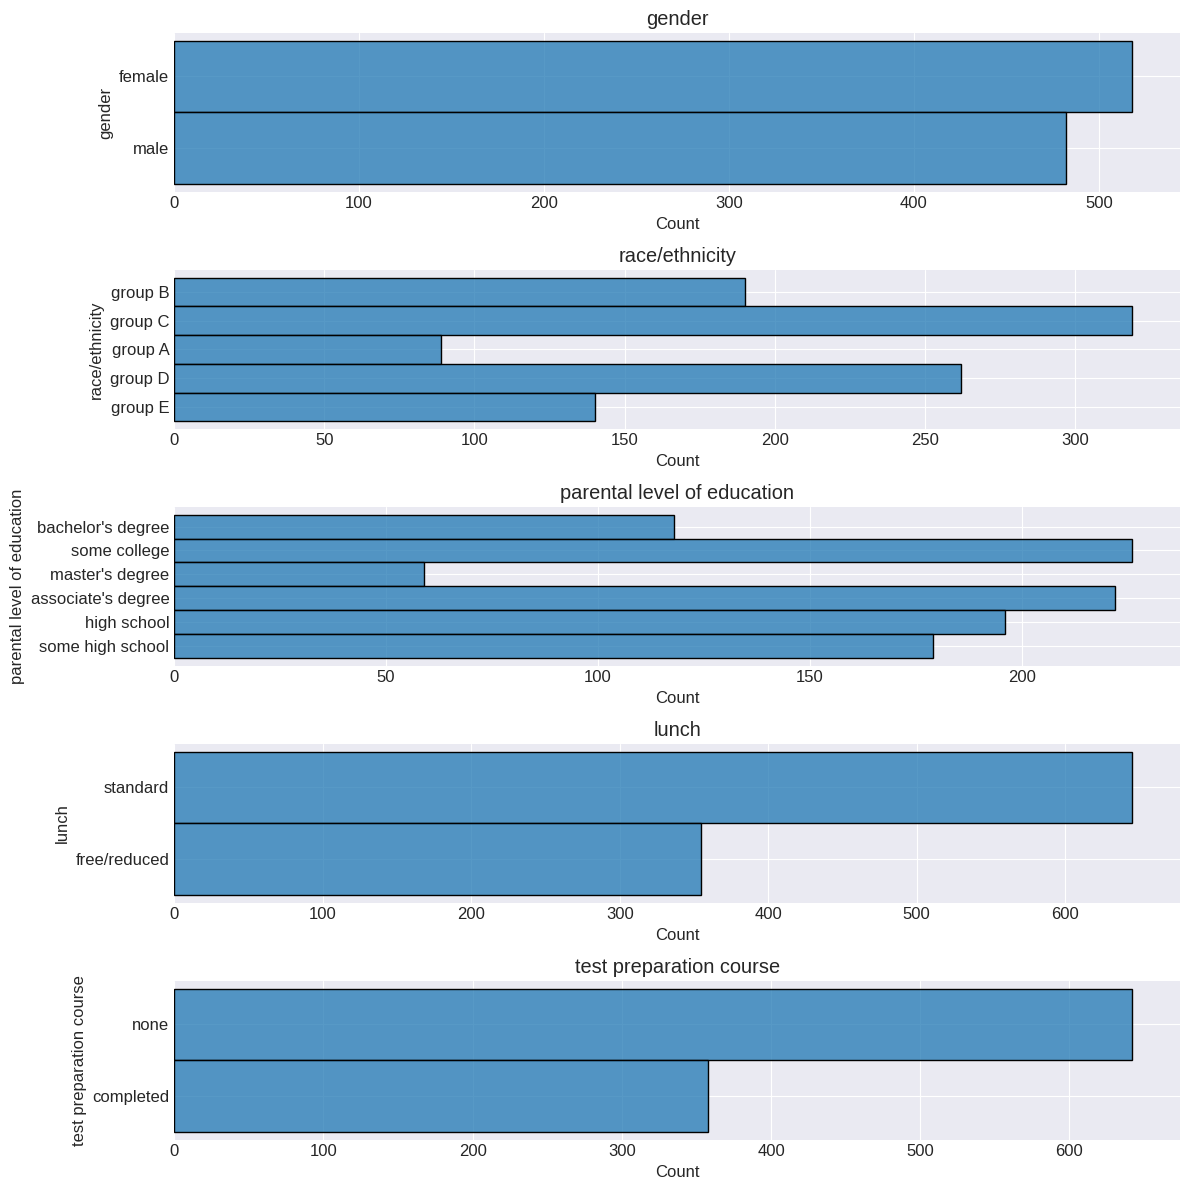

In [22]:
# list all categorical columns
cat_cols = ['gender', 
            'race/ethnicity', 
            'parental level of education', 
            'lunch', 
            'test preparation course']

    #print (count, col)
fig, axes = plt.subplots(5,1, figsize = (12, 12)) # inst the fig and ax

for count, col in enumerate (cat_cols): # loop through the columns

    ax = axes[count]
    
    colCount = data_df[col].value_counts() # get count of items

    ax.set_title(col)

    sns.histplot(data_df, y =col, ax = ax) # plot, ax = ax

plt.tight_layout()

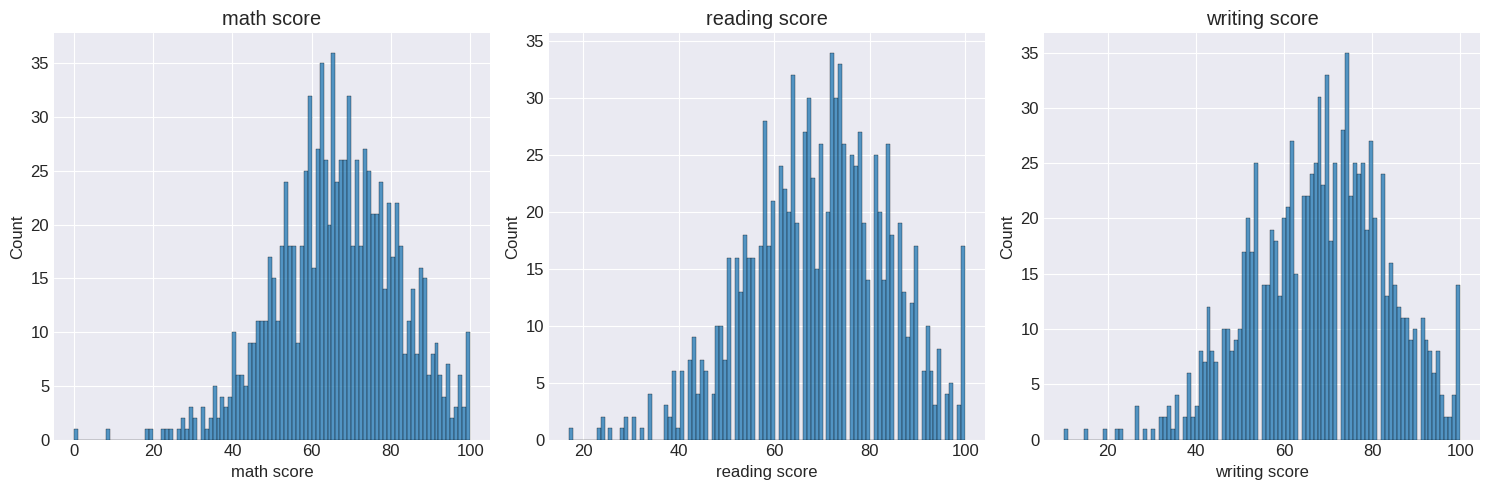

In [28]:
# list all categorical columns
num_cols = ['math score', 'reading score', 'writing score']

    #print (count, col)
fig, axes = plt.subplots(1,3, figsize = (15,5)) # inst the fig and ax

for count, col in enumerate (num_cols): # loop through the columns

    ax = axes[count]
    
    ax.set_title(col)

    sns.histplot(data_df, x =col, ax = ax, bins = 100) # plot, ax = ax

plt.tight_layout()

In [30]:
data_df[['gender', 'math score']].groupby(['gender'], as_index= False).mean()

,gender,math score
0,female,63.633205
1,male,68.728216


In [31]:
data_df[['gender', 'reading score']].groupby(['gender'], as_index= False).mean()

,gender,reading score
0,female,72.608108
1,male,65.473029


In [32]:
data_df[['gender', 'writing score']].groupby(['gender'], as_index= False).mean()

,gender,writing score
0,female,72.467181
1,male,63.311203


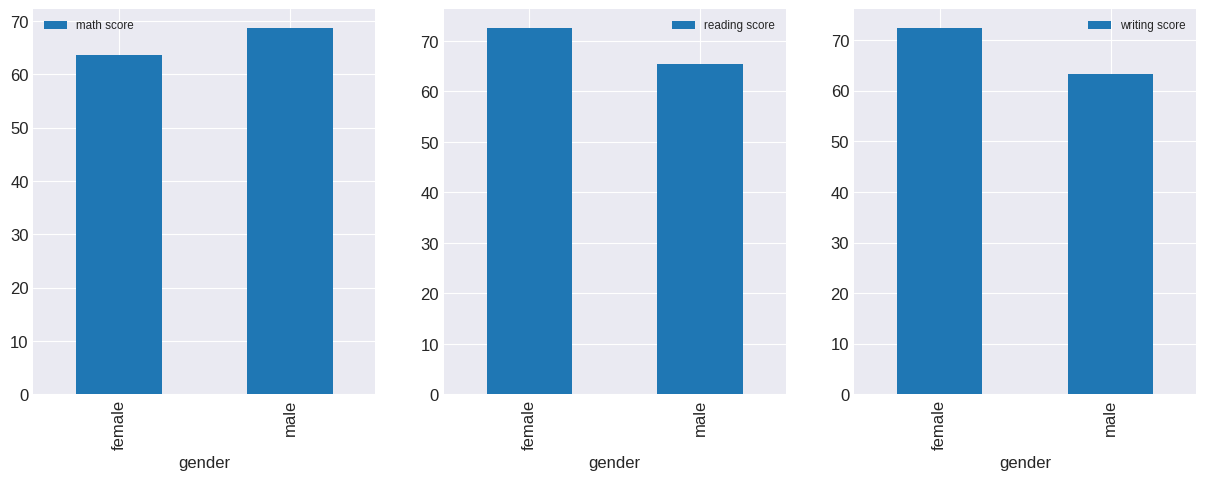

In [36]:
fig, axes = plt.subplots(1,3)

data_df[['gender', 'math score']].groupby(['gender']).mean().plot(kind = 'bar', ax = axes[0]);

data_df[['gender', 'reading score']].groupby(['gender']).mean().plot(kind = 'bar', ax = axes[1]);

data_df[['gender', 'writing score']].groupby(['gender']).mean().plot(kind = 'bar', ax = axes[2]);

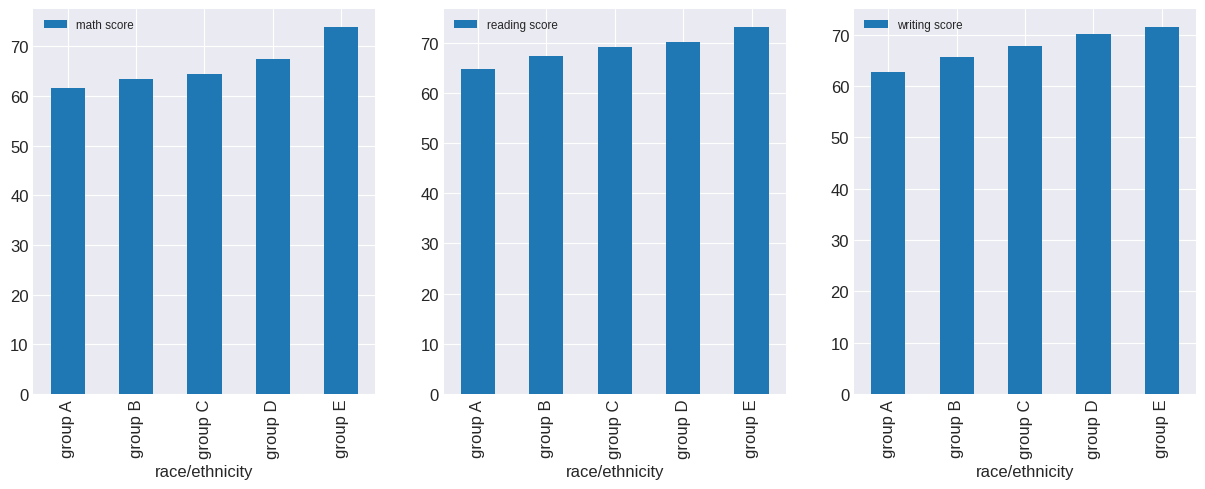

In [38]:
fig, axes = plt.subplots(1,3)

col =  'race/ethnicity' # pick a column name

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[0]); #plot the col 

data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[1]);

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[2]);

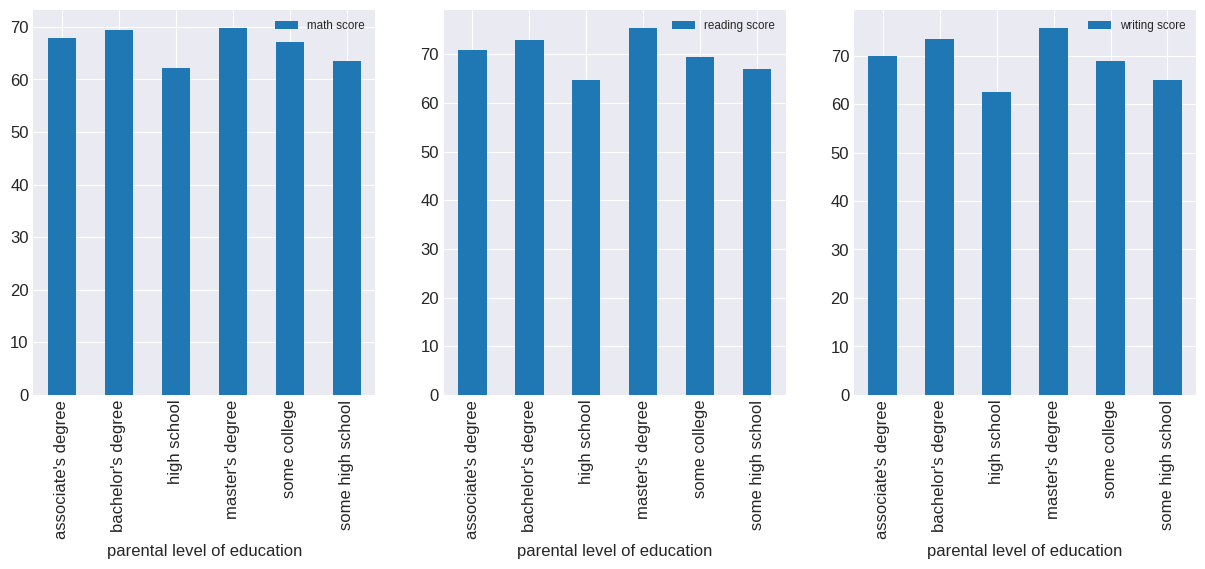

In [39]:
fig, axes = plt.subplots(1,3)

col =  'parental level of education' # pick a column name

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[0]); #plot the col 

data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[1]);

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[2]);